# **Data Cleaning Notebook**

This notebook handles:


  1.Load and clean Dataset

  2.Handle missing values

  3.Handle outliers


# 1.Load and Clean Dataset




Import Libraries

In [4]:
import pandas as pd
import numpy as np

Load Dataset

In [6]:
df = pd.read_csv("../data/Covid-19 Dataset.csv")
df.head(15)


,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI,Recovery_Classification
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,2022-12-15,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7,Delayed Recovery
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,2024-06-08,No,NaN,0,2023-08-21,NaN,Healthcare,Never,21.9,Typical Recovery
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,2023-12-19,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7,Delayed Recovery
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7,Delayed Recovery
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,2023-09-08,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9,Delayed Recovery
5,6,66,Male,Sjælland,Cardiovascular,2022-07-04,Omicron,Moderate,Moderate,No,...,2023-02-22,Yes,AstraZeneca,3,2025-03-07,NaN,Healthcare,Never,29.8,Delayed Recovery
6,7,76,Female,Sjælland,Obesity,2023-04-30,Omicron,Moderate,Critical,Yes,...,2023-08-04,No,NaN,0,2022-10-12,NaN,Unemployed,Former,22.3,Delayed Recovery
7,8,77,Female,Sjælland,Diabetes,2024-03-25,XBB.1.5,Moderate,Low,No,...,2024-09-02,Yes,Janssen,3,2025-05-08,NaN,Driver,Former,24.4,Delayed Recovery
8,9,79,Female,Nordjylland,Hypertension,2023-11-03,XBB.1.5,Mild,Low,No,...,2024-05-13,No,NaN,0,2023-09-01,NaN,Healthcare,Former,26.1,Typical Recovery
9,10,72,Female,Sjælland,Cardiovascular,2023-01-11,Alpha,Severe,High,No,...,2023-06-13,Yes,AstraZeneca,1,2024-08-21,NaN,Unemployed,Current,21.2,Delayed Recovery


Check informations on the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  2850 non-null   object 
 11  Hospital_Discharge_Date  2850 non-null   object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [9]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Region', 'Preexisting_Condition',
       'Date_of_Infection', 'COVID_Strain', 'Symptoms', 'Severity',
       'Hospitalized', 'Hospital_Admission_Date', 'Hospital_Discharge_Date',
       'ICU_Admission', 'Ventilator_Support', 'Recovered', 'Date_of_Recovery',
       'Reinfection', 'Date_of_Reinfection', 'Vaccination_Status',
       'Vaccine_Type', 'Doses_Received', 'Date_of_Last_Dose',
       'Long_COVID_Symptoms', 'Occupation', 'Smoking_Status', 'BMI',
       'Recovery_Classification'],
      dtype='object')

In [10]:
df.shape

(3000, 27)

In [11]:
df.describe()

,Patient_ID,Age,Doses_Received,BMI
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.944000,0.981667,25.096500
std,866.169729,20.872919,1.154025,4.898435
min,1.000000,18.000000,0.000000,10.200000
25%,750.750000,36.000000,0.000000,21.800000
50%,1500.500000,54.000000,0.000000,25.100000
75%,2250.250000,72.000000,2.000000,28.500000
max,3000.000000,89.000000,3.000000,44.600000


Check for duplicate values

In [13]:
df.duplicated().sum()


0

# 2. Handle missing values

In [15]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Region                        0
Preexisting_Condition       469
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date     150
Hospital_Discharge_Date     150
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery            150
Reinfection                   0
Date_of_Reinfection         150
Vaccination_Status            0
Vaccine_Type               1809
Doses_Received                0
Date_of_Last_Dose           150
Long_COVID_Symptoms        2780
Occupation                    0
Smoking_Status                0
BMI                           0
Recovery_Classification     150
dtype: int64

In [16]:
# df.drop(['Patient_ID','Vaccine_Type','Long_COVID_Symptoms'],axis=1,inplace=True)


### 1. clean initial dataset  
- Drop irrelevant columns like `Patient_ID`  
- Replace `"None"` with `NaN`


In [18]:
df.drop(columns=["Patient_ID"], inplace=True)
df.replace("None", np.nan, inplace=True)

In [19]:
df.isnull().sum()

Age                           0
Gender                        0
Region                        0
Preexisting_Condition       469
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date     150
Hospital_Discharge_Date     150
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery            150
Reinfection                   0
Date_of_Reinfection         150
Vaccination_Status            0
Vaccine_Type               1809
Doses_Received                0
Date_of_Last_Dose           150
Long_COVID_Symptoms        2780
Occupation                    0
Smoking_Status                0
BMI                           0
Recovery_Classification     150
dtype: int64

### 2. Convert Date Columns and Clean Data
- Convert all columns containing `"Date"` in their name to datetime objects
- Drop rows where either `Date_of_Infection` or `Date_of_Recovery` is missing
- Remove any duplicate rows to ensure data integrity


In [21]:
date_cols = [col for col in df.columns if "Date" in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

essential_cols = ['Date_of_Infection', 'Date_of_Recovery']
df.dropna(subset=essential_cols, inplace=True)
df.drop_duplicates(inplace=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      2850 non-null   int64         
 1   Gender                   2850 non-null   object        
 2   Region                   2850 non-null   object        
 3   Preexisting_Condition    2413 non-null   object        
 4   Date_of_Infection        2850 non-null   datetime64[ns]
 5   COVID_Strain             2850 non-null   object        
 6   Symptoms                 2850 non-null   object        
 7   Severity                 2850 non-null   object        
 8   Hospitalized             2850 non-null   object        
 9   Hospital_Admission_Date  2706 non-null   datetime64[ns]
 10  Hospital_Discharge_Date  2706 non-null   datetime64[ns]
 11  ICU_Admission            2850 non-null   object        
 12  Ventilator_Support       2850 non-null 

In [23]:
df.nunique()

Age                          72
Gender                        2
Region                        5
Preexisting_Condition         5
Date_of_Infection           717
COVID_Strain                  5
Symptoms                      3
Severity                      4
Hospitalized                  2
Hospital_Admission_Date     956
Hospital_Discharge_Date     968
ICU_Admission                 2
Ventilator_Support            2
Recovered                     2
Date_of_Recovery            981
Reinfection                   2
Date_of_Reinfection         860
Vaccination_Status            2
Vaccine_Type                  4
Doses_Received                4
Date_of_Last_Dose          1127
Long_COVID_Symptoms           4
Occupation                    6
Smoking_Status                3
BMI                         264
Recovery_Classification       3
dtype: int64

## Handle Outliers

In [25]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]



In [26]:
print(lower_bound)
print(upper_bound)

11.750000000000002
38.55


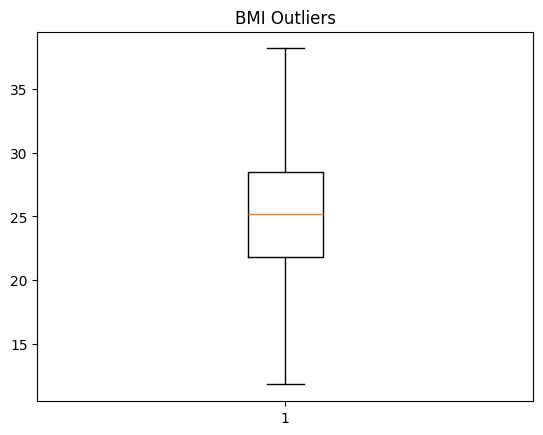

In [27]:
import matplotlib.pyplot as plt

plt.boxplot(df['BMI'])
plt.title("BMI Outliers")
plt.show()


In [28]:
df.shape

(2832, 26)

## Fill Missing Data Values

In [30]:
df.isnull().sum()

Age                           0
Gender                        0
Region                        0
Preexisting_Condition       434
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date     142
Hospital_Discharge_Date     142
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery              0
Reinfection                   0
Date_of_Reinfection         142
Vaccination_Status            0
Vaccine_Type               1708
Doses_Received                0
Date_of_Last_Dose           136
Long_COVID_Symptoms        2612
Occupation                    0
Smoking_Status                0
BMI                           0
Recovery_Classification       0
dtype: int64

In [31]:
df["Hospital_Admission_Date"].fillna(df["Date_of_Infection"] + pd.Timedelta(days=1), inplace=True)
df["Hospital_Discharge_Date"].fillna(df["Date_of_Recovery"], inplace=True)
df["Date_of_Reinfection"].fillna(df["Date_of_Recovery"], inplace=True)
df["Date_of_Last_Dose"].fillna(df["Date_of_Infection"], inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2832 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      2832 non-null   int64         
 1   Gender                   2832 non-null   object        
 2   Region                   2832 non-null   object        
 3   Preexisting_Condition    2398 non-null   object        
 4   Date_of_Infection        2832 non-null   datetime64[ns]
 5   COVID_Strain             2832 non-null   object        
 6   Symptoms                 2832 non-null   object        
 7   Severity                 2832 non-null   object        
 8   Hospitalized             2832 non-null   object        
 9   Hospital_Admission_Date  2832 non-null   datetime64[ns]
 10  Hospital_Discharge_Date  2832 non-null   datetime64[ns]
 11  ICU_Admission            2832 non-null   object        
 12  Ventilator_Support       2832 non-null 

In [33]:
df.to_csv("../data/Cleaned_Data.csv", index=False)